Exercise 1_2

In [6]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import sklearn.metrics as mc

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from mlxtend.plotting import plot_decision_regions

In [19]:
from sklearn.datasets import make_classification

n_samples = 2000
n_features = 2
n_clusters_per_class = 1
n_redundant = 0
n_classes = 2
random_state = 7

X, y = make_classification(n_samples=n_samples,
                           n_features=n_features,
                           n_clusters_per_class=n_clusters_per_class,
                           n_redundant=n_redundant,
                           n_classes=n_classes,
                           random_state=random_state)
print(X.shape)
print(y.shape)


(2000, 2)
(2000,)


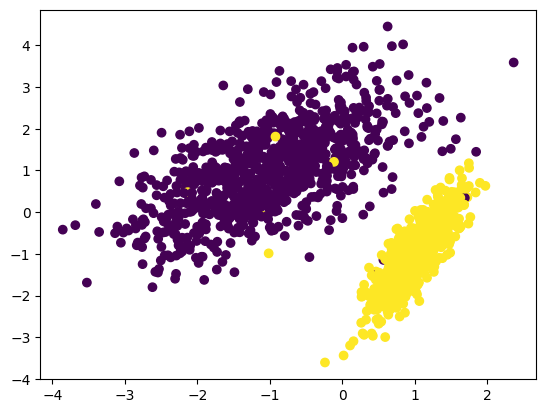

In [20]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

**Exercise 1_3**

In [24]:
from sklearn.model_selection import train_test_split

test_size = 0.2
random_state = 7
stratify = y

x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=test_size,
    random_state=random_state,
    stratify=stratify
)

print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (1600, 2)
y_train shape: (1600,)
x_test shape: (400, 2)
y_test shape: (400,)


In [44]:
Logistic_model = LogisticRegression(solver='sag', max_iter=30, random_state=7)
Logistic_model.fit(x_train, y_train)
y_pred = Logistic_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

train_accuracy = Logistic_model.score(x_train, y_train)
test_accuracy = Logistic_model.score(x_test, y_test)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

print('Confusion Matrix:')
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(Logistic_model.predict_proba(x_test)[-40:])


Accuracy: 99.00%
Training Accuracy: 99.25%
Testing Accuracy: 99.00%
Confusion Matrix:
[[198   2]
 [  2 198]]
[[9.99090724e-01 9.09275951e-04]
 [2.08108932e-03 9.97918911e-01]
 [2.77580734e-02 9.72241927e-01]
 [2.89891241e-03 9.97101088e-01]
 [6.57676976e-03 9.93423230e-01]
 [3.17887651e-03 9.96821123e-01]
 [6.28053112e-03 9.93719469e-01]
 [3.30208511e-03 9.96697915e-01]
 [9.80833638e-01 1.91663623e-02]
 [2.45130419e-02 9.75486958e-01]
 [9.97788376e-01 2.21162412e-03]
 [5.74270126e-03 9.94257299e-01]
 [9.99408906e-01 5.91094281e-04]
 [3.53769772e-02 9.64623023e-01]
 [1.81159515e-02 9.81884049e-01]
 [9.98891036e-01 1.10896367e-03]
 [1.09459268e-02 9.89054073e-01]
 [8.84185608e-03 9.91158144e-01]
 [5.32303627e-03 9.94676964e-01]
 [1.19161105e-02 9.88083889e-01]
 [3.32963778e-02 9.66703622e-01]
 [9.99783712e-01 2.16287635e-04]
 [7.00684098e-04 9.99299316e-01]
 [2.56617594e-03 9.97433824e-01]
 [9.99327817e-01 6.72182504e-04]
 [4.58009344e-03 9.95419907e-01]
 [9.99538942e-01 4.61057606e-04]


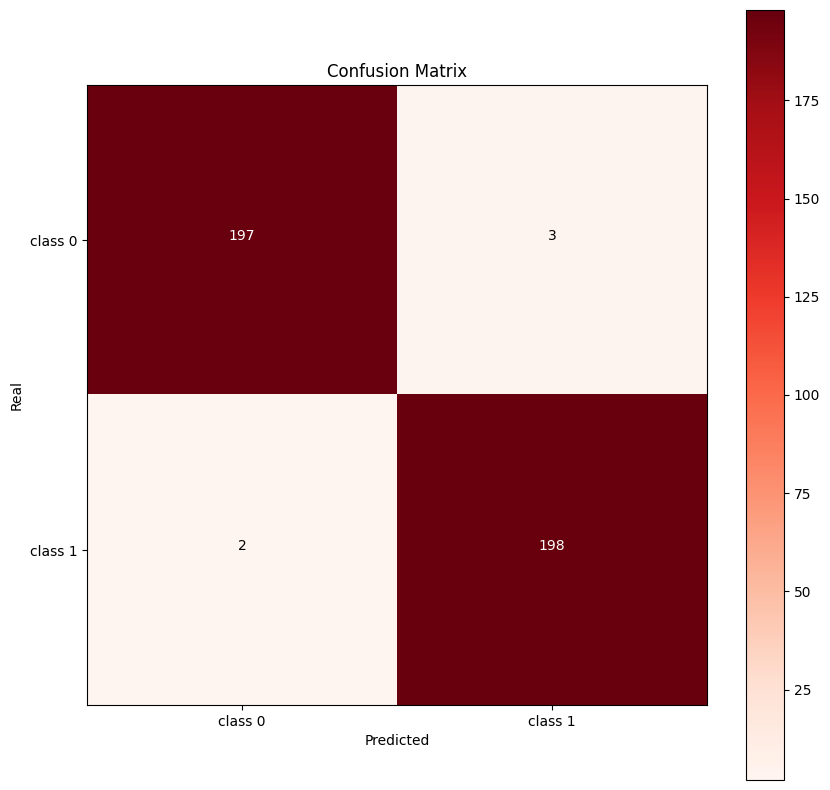

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))

plt.imshow(cm, cmap=plt.cm.Reds, interpolation='nearest')

plt.xticks(range(2), ['class 0', 'class 1'])

plt.yticks(range(2), ['class 0', 'class 1'])

plt.colorbar()

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix')

plt.show()


In [38]:
from sklearn.linear_model import RidgeClassifier

ridge_model = RidgeClassifier(random_state=4)

ridge_model.fit(x_train, y_train)

y_pred = ridge_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

train_accuracy = ridge_model.score(x_train, y_train)
test_accuracy = ridge_model.score(x_test, y_test)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 98.75%
Training Accuracy: 98.75%
Testing Accuracy: 98.75%
Confusion Matrix:
[[197   3]
 [  2 198]]


In [39]:
sgd_model=SGDClassifier(loss="hinge",max_iter=2000, random_state=7,learning_rate='optimal',alpha=0.01)

sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

train_accuracy = sgd_model.score(x_train, y_train)
test_accuracy = sgd_model.score(x_test, y_test)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print(Logistic_model.predict_proba(x_test)[-20:])


Accuracy: 99.25%
Training Accuracy: 99.25%
Testing Accuracy: 99.25%
Confusion Matrix:
[[199   1]
 [  2 198]]
[[3.32963778e-02 9.66703622e-01]
 [9.99783712e-01 2.16287635e-04]
 [7.00684098e-04 9.99299316e-01]
 [2.56617594e-03 9.97433824e-01]
 [9.99327817e-01 6.72182504e-04]
 [4.58009344e-03 9.95419907e-01]
 [9.99538942e-01 4.61057606e-04]
 [9.99809316e-01 1.90683645e-04]
 [9.20586337e-03 9.90794137e-01]
 [9.99989803e-01 1.01974544e-05]
 [9.99453090e-01 5.46910495e-04]
 [9.96165188e-01 3.83481152e-03]
 [2.42943571e-03 9.97570564e-01]
 [3.97395955e-02 9.60260405e-01]
 [6.14701015e-03 9.93852990e-01]
 [1.23624755e-02 9.87637525e-01]
 [9.99989367e-01 1.06333661e-05]
 [9.99990155e-01 9.84547142e-06]
 [2.69291235e-02 9.73070877e-01]
 [9.99704565e-01 2.95435149e-04]]


Exercise 1_4

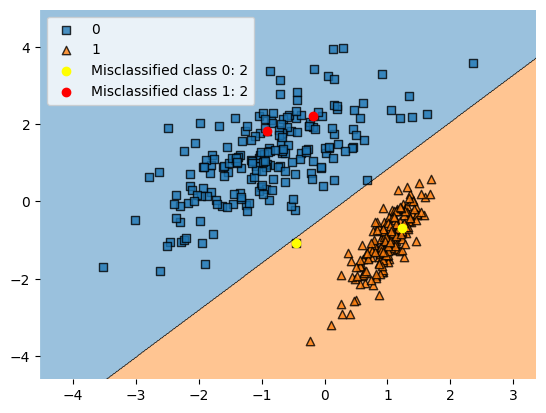

In [47]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

plot_decision_regions(x_test, y_test, clf=Logistic_model)

misclassified = np.where(y_test != y_pred)

errors_class_0 = np.sum(y_test[misclassified] == 0)
errors_class_1 = np.sum(y_test[misclassified] == 1)

plt.scatter(x_test[misclassified][y_test[misclassified] == 0, 0],
            x_test[misclassified][y_test[misclassified] == 0, 1],
            color='Yellow', label=f'Misclassified class 0: {errors_class_0}')

plt.scatter(x_test[misclassified][y_test[misclassified] == 1, 0],
            x_test[misclassified][y_test[misclassified] == 1, 1],
            color='red', label=f'Misclassified class 1: {errors_class_1}')

plt.legend()

plt.show()


In [ ]:
#pip install drawdata

 **Exercise 1_5**

In [11]:
import pandas as pd
from drawdata import ScatterWidget

widget = ScatterWidget()
widget

ScatterWidget()

In [9]:
widget.data
widget_data=widget.data_as_pandas

In [16]:
widget_data.to_csv('drawdata.csv', index=False)


In [21]:
df=pd.read_csv(r'/content/drive/MyDrive/data set/drawdata.csv')

In [22]:
df

,x,y,color,label
0,189.525973,441.574097,#1f77b4,a
1,181.709099,409.884209,#1f77b4,a
2,173.058046,377.669568,#1f77b4,a
3,141.547477,344.849163,#1f77b4,a
4,125.143004,315.742698,#1f77b4,a
...,...,...,...,...
425,549.852756,249.414986,#2ca02c,c
426,569.370188,231.297157,#2ca02c,c
427,542.295946,247.157448,#2ca02c,c
428,555.426004,262.731319,#2ca02c,c


In [23]:
df=df.drop(columns=['color'])
df.keys()

Index(['x', 'y', 'label'], dtype='object')

In [24]:
df

,x,y,label
0,189.525973,441.574097,a
1,181.709099,409.884209,a
2,173.058046,377.669568,a
3,141.547477,344.849163,a
4,125.143004,315.742698,a
...,...,...,...
425,549.852756,249.414986,c
426,569.370188,231.297157,c
427,542.295946,247.157448,c
428,555.426004,262.731319,c


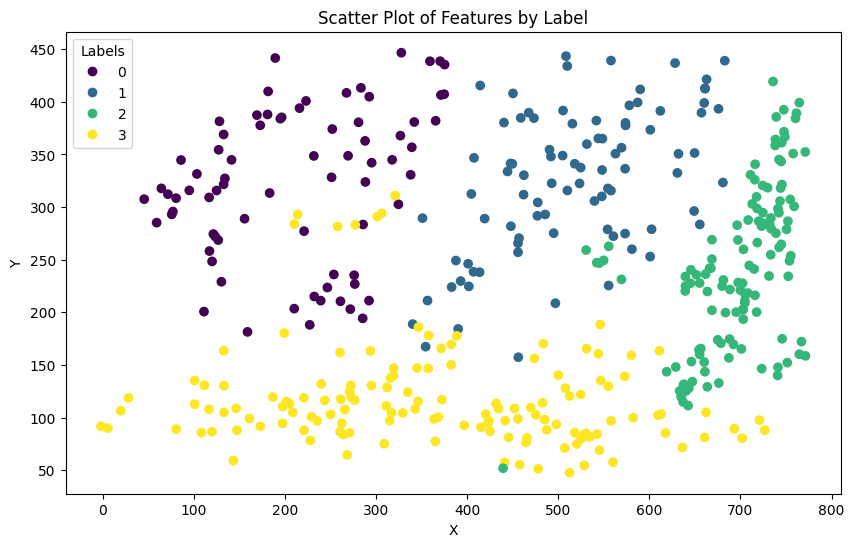

In [25]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['x'], df['y'], c=df['label'].astype('category').cat.codes, cmap='viridis')
plt.title('Scatter Plot of Features by Label')
plt.xlabel('X')
plt.ylabel('Y')
legend1 = plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

In [26]:
df

,x,y,label
0,189.525973,441.574097,a
1,181.709099,409.884209,a
2,173.058046,377.669568,a
3,141.547477,344.849163,a
4,125.143004,315.742698,a
...,...,...,...
425,549.852756,249.414986,c
426,569.370188,231.297157,c
427,542.295946,247.157448,c
428,555.426004,262.731319,c


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['x', 'y']] = scaler.fit_transform(df[['x', 'y']])

df


,x,y,label
0,-1.333202,1.924706,a
1,-1.370727,1.632935,a
2,-1.412256,1.336333,a
3,-1.563522,1.034154,a
4,-1.642271,0.766169,a
...,...,...,...
425,0.396536,0.155487,c
426,0.490229,-0.011325,c
427,0.360260,0.134701,c
428,0.423290,0.278091,c


In [28]:
label_mapping = {'a': 0, 'b': 1, 'c': 2,'d':3 }
df['label_new'] = df['label'].map(label_mapping)
print(df)


            x         y label  label_new
0   -1.333202  1.924706     a          0
1   -1.370727  1.632935     a          0
2   -1.412256  1.336333     a          0
3   -1.563522  1.034154     a          0
4   -1.642271  0.766169     a          0
..        ...       ...   ...        ...
425  0.396536  0.155487     c          2
426  0.490229 -0.011325     c          2
427  0.360260  0.134701     c          2
428  0.423290  0.278091     c          2
429 -0.133096 -1.663079     c          2

[430 rows x 4 columns]


In [29]:
df=df.drop(columns=['label'])
df.keys()

Index(['x', 'y', 'label_new'], dtype='object')

In [30]:
df

,x,y,label_new
0,-1.333202,1.924706,0
1,-1.370727,1.632935,0
2,-1.412256,1.336333,0
3,-1.563522,1.034154,0
4,-1.642271,0.766169,0
...,...,...,...
425,0.396536,0.155487,2
426,0.490229,-0.011325,2
427,0.360260,0.134701,2
428,0.423290,0.278091,2


In [32]:
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values
print(X.shape)
print(y.shape)


(430, 2)
(430,)


In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=7,stratify=y,shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((344, 2), (344,), (86, 2), (86,))

In [34]:
y_train

array([3, 0, 3, 2, 3, 0, 2, 1, 1, 3, 3, 2, 2, 1, 2, 2, 0, 2, 3, 0, 0, 2,
       1, 0, 0, 3, 2, 2, 0, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3, 0, 2, 1, 1, 3,
       3, 3, 2, 1, 3, 3, 2, 1, 0, 0, 2, 3, 3, 3, 3, 2, 0, 1, 0, 1, 2, 3,
       1, 0, 2, 3, 3, 1, 2, 2, 2, 0, 3, 0, 2, 3, 2, 1, 3, 3, 2, 2, 2, 3,
       2, 1, 3, 1, 2, 1, 1, 2, 3, 1, 2, 2, 2, 1, 1, 3, 3, 3, 3, 3, 2, 2,
       0, 2, 1, 3, 2, 1, 3, 1, 2, 3, 1, 3, 2, 2, 3, 3, 1, 3, 1, 0, 2, 2,
       3, 2, 2, 3, 3, 1, 0, 3, 3, 3, 3, 3, 0, 2, 3, 2, 3, 2, 3, 3, 2, 1,
       0, 1, 3, 0, 2, 3, 3, 0, 2, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 3,
       1, 0, 2, 3, 0, 1, 2, 1, 3, 0, 0, 2, 0, 0, 3, 1, 2, 2, 3, 2, 0, 2,
       2, 2, 2, 2, 0, 3, 1, 2, 0, 1, 2, 3, 1, 1, 3, 1, 2, 2, 3, 0, 0, 1,
       1, 3, 0, 2, 0, 0, 3, 2, 0, 1, 2, 1, 1, 3, 3, 3, 3, 2, 1, 1, 0, 3,
       0, 3, 2, 1, 3, 1, 3, 2, 0, 0, 1, 0, 3, 3, 2, 3, 0, 0, 3, 3, 2, 2,
       0, 1, 2, 2, 1, 3, 0, 3, 3, 1, 3, 1, 0, 3, 0, 3, 0, 3, 1, 3, 2, 1,
       1, 0, 3, 2, 1, 2, 2, 0, 0, 0, 3, 2, 1, 0, 3,

In [35]:
y_test

array([0, 2, 3, 3, 3, 3, 1, 0, 1, 2, 3, 3, 0, 0, 1, 3, 0, 2, 1, 1, 3, 2,
       2, 3, 2, 1, 0, 2, 3, 3, 2, 1, 2, 0, 2, 3, 1, 0, 0, 2, 1, 0, 1, 3,
       0, 1, 3, 3, 1, 3, 2, 3, 2, 0, 3, 3, 2, 1, 1, 3, 2, 2, 1, 1, 1, 2,
       2, 0, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 1, 3, 0, 2, 3, 0, 2])

In [36]:
Logistic_model = LogisticRegression(solver='sag', max_iter=10, random_state=7)
Logistic_model.fit(x_train, y_train)
y_pred =  Logistic_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

train_accuracy =  Logistic_model.score(x_train, y_train)
test_accuracy =  Logistic_model.score(x_test, y_test)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

print('Confusion Matrix:')
cm=confusion_matrix(y_test, y_pred)
print(cm)
error = mc.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {error:.5f}\n")
print( Logistic_model.predict_proba(x_test)[-10:])


Accuracy: 93.02%
Training Accuracy: 90.99%
Testing Accuracy: 93.02%
Confusion Matrix:
[[14  0  0  1]
 [ 0 18  0  0]
 [ 0  1 24  0]
 [ 2  0  2 24]]
Mean Squared Error (MSE): 0.34884

[[6.67378473e-06 1.35539522e-02 9.71445726e-01 1.49936477e-02]
 [1.98001006e-05 1.59948250e-02 6.75703303e-01 3.08282071e-01]
 [6.27382274e-04 4.49969401e-02 1.14451883e-01 8.39923795e-01]
 [5.96040354e-02 8.56618919e-01 7.74089915e-02 6.36805446e-03]
 [5.54643275e-05 8.07525923e-03 6.56623505e-02 9.26206926e-01]
 [5.89175846e-01 2.06913917e-01 6.38627963e-04 2.03271609e-01]
 [1.41922468e-04 1.05273404e-01 8.93893961e-01 6.90712784e-04]
 [1.34226441e-04 3.69407073e-03 5.12320007e-03 9.91048503e-01]
 [9.74818120e-01 2.29581623e-02 2.00345468e-06 2.22171391e-03]
 [1.90074582e-04 5.71048581e-02 6.11837398e-01 3.30867669e-01]]


In [45]:
sgd_model=SGDClassifier(loss="hinge",max_iter=900, random_state=7,learning_rate='optimal',alpha=0.002)

sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

train_accuracy = sgd_model.score(x_train, y_train)
test_accuracy = sgd_model.score(x_test, y_test)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print(Logistic_model.predict_proba(x_test)[-20:])


Accuracy: 91.86%
Training Accuracy: 88.08%
Testing Accuracy: 91.86%
Confusion Matrix:
[[14  0  0  1]
 [ 0 16  2  0]
 [ 0  1 24  0]
 [ 2  0  1 25]]
[[1.64812492e-04 7.65173718e-02 8.79005241e-01 4.43125749e-02]
 [6.05160158e-01 3.90325170e-01 1.00511376e-03 3.50955807e-03]
 [3.95713991e-03 1.48658665e-02 1.57703694e-03 9.79599957e-01]
 [5.93691940e-05 4.74519208e-02 9.35354288e-01 1.71344216e-02]
 [3.14888508e-05 1.37887149e-02 3.39033893e-01 6.47145903e-01]
 [2.44565419e-05 3.42829208e-02 9.63119338e-01 2.57328424e-03]
 [1.87809716e-05 2.84641746e-02 9.67875371e-01 3.64167368e-03]
 [2.55611680e-02 2.65393963e-03 6.10107138e-06 9.71778791e-01]
 [1.13059885e-01 1.68735681e-03 4.39285678e-07 8.85252319e-01]
 [1.44359386e-04 1.07305676e-01 8.91929232e-01 6.20732740e-04]
 [6.67378473e-06 1.35539522e-02 9.71445726e-01 1.49936477e-02]
 [1.98001006e-05 1.59948250e-02 6.75703303e-01 3.08282071e-01]
 [6.27382274e-04 4.49969401e-02 1.14451883e-01 8.39923795e-01]
 [5.96040354e-02 8.56618919e-01 7.

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


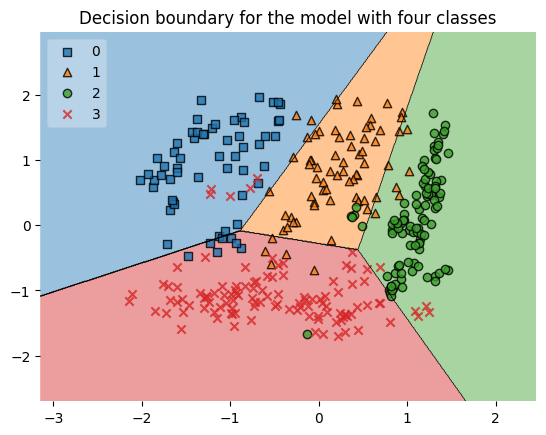

In [38]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(x_train, y_train, clf=sgd_model, legend=2)
plt.title('Decision boundary for the model with four classes')
plt.show()


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


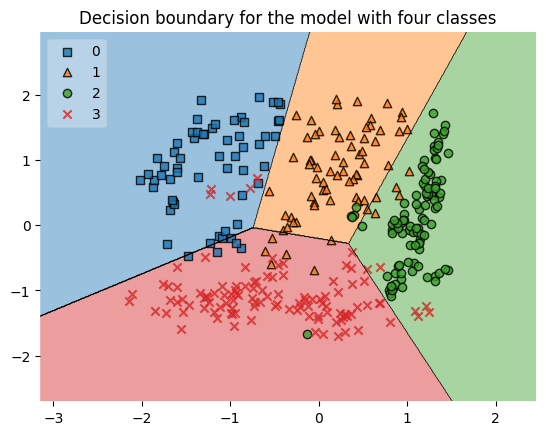

In [46]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(x_train, y_train, clf=Logistic_model, legend=2)
plt.title('Decision boundary for the model with four classes')
plt.show()


(array([ 4, 13, 18, 40, 55, 61, 77]),)


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


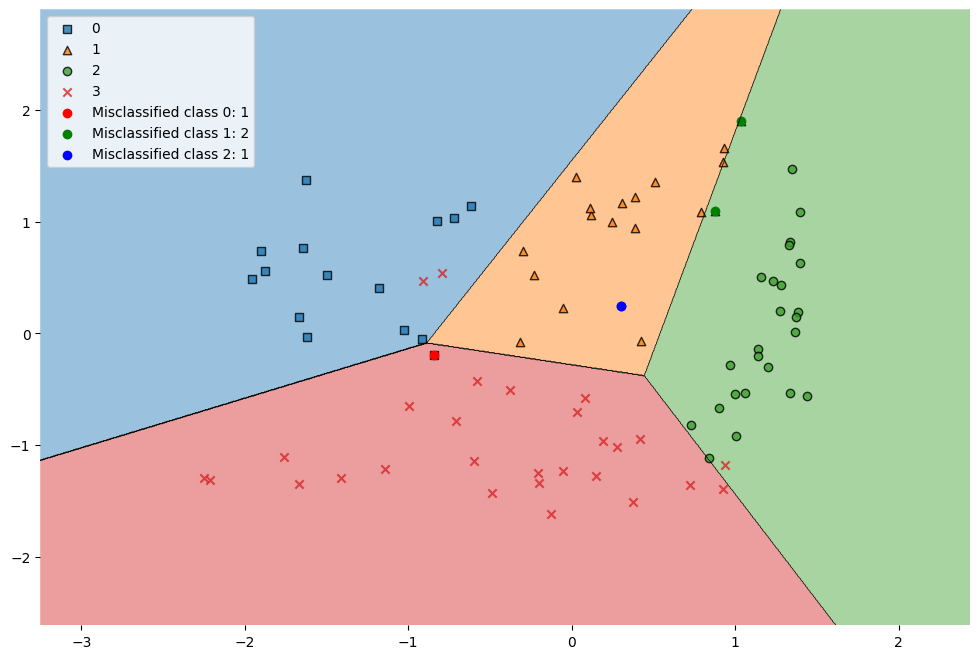

In [55]:
plt.figure(figsize=(12, 8))

plot_decision_regions(x_test,y_test,clf=sgd_model)
misclassified = np.where(y_test != y_pred)
print(misclassified)
errors_class_0 = np.sum(y_test[misclassified] == 0)
errors_class_1 = np.sum(y_test[misclassified] == 1)
errors_class_2 = np.sum(y_test[misclassified] == 2)
plt.scatter(x_test[misclassified][y_test[misclassified] == 0, 0],
            x_test[misclassified][y_test[misclassified] == 0, 1],
            color='red', label=f'Misclassified class 0: {errors_class_0}')
plt.scatter(x_test[misclassified][y_test[misclassified] == 1, 0],
            x_test[misclassified][y_test[misclassified] == 1, 1],
            color='green', label=f'Misclassified class 1: {errors_class_1}')
plt.scatter(x_test[misclassified][y_test[misclassified] == 2, 0],
            x_test[misclassified][y_test[misclassified] == 2, 1],
            color='blue', label=f'Misclassified class 2: {errors_class_2}')
plt.legend(loc='upper left')
